<a href="https://colab.research.google.com/github/chiara5086/ds-II-proyecto-arias/blob/main/Preentrega_PF_DSII_Arias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preentrega del Proyecto Final: Análisis Encuesta**

**Base de datos:**  
[Descargar dataset en GitHub](https://github.com/chiara5086/ds-II-proyecto-arias/raw/refs/heads/main/ds-encuesta.xlsx)

**Curso:** Data Science II  
**N° de Comisión:** 67485  
**Alumna:** Chiara Arias
**Profesor:** Gustavo Benitez  
**Tutor:** Guillermo Mallo

**Fecha:** 05/08/2025

## **Índice**

1. [Introducción](#1-introduccion)
2. [Abstracto: motivación y audiencia](#2-abstracto-motivacion)  
3. [Definición de objetivo](#3-objetivo)
4. [Preguntas de Investigación e Hipótesis](#4-preguntas-e-hipotesis)
5. [Obtención de datos desde una API pública](#5-API-publica)
6. [Importación de librerías y dataset](#6-importacion-de-librerias-y-dataset)
7. [Exploración de datos (EDA)](#7-eda)
8. [Método de selección de características (feature selection)](#8-metodo-seleccion)
9. [Elegir y entrenar un algoritmo de clasificación](#9-elegir-algoritmo)
10. [Cálculo de métricas básicas para validar el modelo](#10-calculo-metricas)
11. [Conclusiones](#10-conclusiones)


<a id="#1-introduccion"></a>
## **1. Introducción**

En este trabajo se examina una encuesta simulada a fans de Taylor Swift para determinar cómo diversos factores demográficos y de comportamiento (actividad en redes, nivel educativo, país de residencia, conocimiento de “Easter Eggs”, antigüedad en el fandom, etc.) se asocian con el nivel de compromiso (fanatismo, identificación emocional, asistencia a conciertos, compra de vinilos). La base de datos incluye aproximadamente 100 respuestas reales obtenidas el año pasado, complementadas con 1.980 respuestas generadas por IA para alcanzar el tamaño de muestra requerido.

<a id="#2-abstracto-motivacion"></a>
## **2. Abstracto: motivación y audiencia**
**Motivación**  
La comunidad de fans de Taylor Swift es masiva y diversa. Entender qué variables (como edad, país o preferencias musicales) impulsan su compromiso “fanático” ayuda a crear estrategias de marketing y comunidad más efectivas.

**Audiencia**  
- Equipos de marketing y community managers de la industria musical.  
- Analistas y gerentes de producto que buscan optimizar el engagement de sus audiencias.


<a id="#2-objetivo"></a>
## **3. Definición de objetivo**

**Objetivo general**  
Obtener y combinar datos de la encuesta de fans de Taylor Swift con al menos una fuente pública externa (API o base de datos), para luego analizarlos con Python y responder a la pregunta de qué factores demográficos y de comportamiento se asocian con el nivel de compromiso (“fanatismo”) de los encuestados. Se aplicarán técnicas avanzadas de limpieza y adquisición de datos sobre datasets complejos, con el fin de generar recomendaciones de estrategias de marketing y de comunidad que refuercen el engagement en los segmentos de fans más relevantes.

**Objetivos específicos**  
- Determinar si variables como edad, país de residencia o nivel educativo se relacionan con un mayor nivel de fanatismo.  
- Explorar cómo el comportamiento en redes sociales (p. ej., seguir a Taylor en redes, participación en debates de teorías, pertenencia a foros) impacta en la intensidad de la identificación emocional y en hábitos de consumo (compra de entradas, vinilos o merch).  
- Detectar patrones (por ejemplo, clústeres o agrupaciones de perfiles de fans) que puedan servir para segmentar a la audiencia y personalizar campañas de comunicación.  


<a id="#4-preguntas-e-hipotesis"></a>
## **4. Preguntas de Investigación e Hipótesis**

En este proyecto exploramos cinco cuestiones clave:

1. **Seguimiento en redes y fanatismo**  
   - **Pregunta:** ¿Los encuestados que siguen a Taylor Swift en redes sociales presentan un nivel de fanatismo promedio más alto que quienes no la siguen?  
   - **Hipótesis H1:** Quienes siguen a Taylor en redes (Sí) tienen un fanatismo promedio mayor que quienes no la siguen (No).

2. **Nivel educativo y compra de vinilos**  
   - **Pregunta:** ¿El nivel educativo de los encuestados está asociado a su probabilidad de comprar vinilos?  
   - **Hipótesis H2:** Quienes tienen nivel educativo Terciario o Universitario muestran una proporción de compra de vinilos (“Sí”) superior a quienes tienen nivel Primario o Secundario.

3. **Edad, género y fanatismo**  
   - **Pregunta:** ¿Varía el nivel de fanatismo según la combinación de edad y género?
   - **Hipótesis H3:** La influencia de la edad en el grado de fanatismo es distinta en hombres y en mujeres.

4. **Densidad de población y fanatismo**  
   - **Pregunta:** ¿La densidad de población (habitantes/km²) de cada país se asocia al nivel de fanatismo promedio de sus encuestados?
   - **Hipótesis H4:** Los países con mayor densidad de población presentan un fanatismo promedio más alto que aquellos con baja densidad.



<a id="#5-API-publica"></a>
## **5. Obtención de datos desde una API pública**

A continuación descargamos información de países desde la API Rest Countries y la guardamos localmente.


In [44]:
import requests
import pandas as pd

# Endpoint v2 con parámetro fields (ahora incluyendo alpha3Code)
url = "https://restcountries.com/v2/all?fields=name,alpha2Code,alpha3Code,region,population"
try:
    respuesta = requests.get(url, timeout=10)
    respuesta.raise_for_status()
    datos = respuesta.json()
    df_paises = pd.json_normalize(datos)

    # Guardar en CSV local
    df_paises.to_csv("datos_paises.csv", index=False, encoding="utf-8")

    # Guardar en JSON local
    df_paises.to_json("datos_paises.json", orient="records", force_ascii=False)

    print("✅ Datos de países guardados en datos_paises.csv y datos_paises.json")
except requests.exceptions.HTTPError as err:
    print(f"❌ Error al descargar datos: {err} - {respuesta.text}")

✅ Datos de países guardados en datos_paises.csv y datos_paises.json


**Comentario sobre la integración de Rest Countries API**

Se ha enriquecido la encuesta con dos variables adicionales obtenidas de la Rest Countries API:

- **population**: tamaño de la población de cada país, que nos permite comparar mercados nacionales (por ejemplo, Argentina vs Uruguay) y explorar si hay relación entre el tamaño del país y el nivel de fanatismo o el seguimiento en redes.  
- **region**: macroregión geográfica (América Latina, Europa, Norteamérica), que facilita el análisis comparativo entre grupos de fans según su mercado.  

Según el mapeo de la hoja **Pais Residencia** y los códigos de encuesta, los encuestados se distribuyen así:  
- América Latina: 1 681 respuestas (≈81 %)  
- Europa (España y Noruega): 355 respuestas (≈17 %)  
- Estados Unidos: 44 respuestas (≈2 %)  

No hay datos de Asia ni África, pero con **region** podemos diferenciar claramente los principales mercados representados y responder preguntas sobre diferencias culturales y de comportamiento entre ellos.  

<a id="#6-importacion-de-librerias-y-dataset"></a>
## **6. Importación de librerías y dataset**

In [32]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 2. Descargar y leer todas las hojas del Excel
!wget -q -O ds-encuesta.xlsx \
    "https://github.com/chiara5086/ds-II-proyecto-arias/raw/refs/heads/main/ds-encuesta.xlsx"
all_sheets = pd.read_excel("ds-encuesta.xlsx", sheet_name=None)

# 3. Mostrar nombres de hojas
print("Hojas cargadas:", list(all_sheets.keys()))

# 4. Asignar la hoja principal a df
df = all_sheets["tabla_def_ts"]

# Ignorar SOLO los FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

Hojas cargadas: ['tabla_def_ts', 'Genero', 'Pais Residencia', 'Nivel Educativo', 'Estado Nivel Ed', 'Ocupacion', 'Albums', 'Canciones', 'Genero musical', 'Compra entradas', 'Compra Merch', 'Momento vida', 'Easter Eggs', 'Red social', 'Fandom', 'Grupos o Foros', 'Debates', 'Interés', 'Vinilo']


<a id="#7-eda"></a>
## **7. Exploración de datos (EDA)**

###**7.1 Limpieza de datos**
Tipo de datos y valores nulos:
Usamos df.info() para conocer:
- Cuántas filas y columnas hay.
- Tipo de dato de cada columna (int, float, object, etc.).
- Cuántos valores no nulos existen en cada columna.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   id_encuestado                              2080 non-null   int64         
 1   Fecha                                      2080 non-null   datetime64[ns]
 2   Edad                                       2080 non-null   int64         
 3   Genero                                     2080 non-null   int64         
 4   Pais de residencia                         2080 non-null   int64         
 5   Nivel educativo alcanzado                  2080 non-null   int64         
 6   Estado Nivel Ed                            2080 non-null   int64         
 7   Ocupacion                                  2080 non-null   int64         
 8   Anio en que te hiciste fan                 2080 non-null   int64         
 9   Album favorito     

No existen nulos en este dataset

###**7.2 Resumen de metadata**
df.describe(include='all') nos da:
- Para variables numéricas: conteo, media, desvío, min, percentiles, max.
- Para variables categóricas: conteo, valores únicos, valor más frecuente (top), frecuencia.

In [35]:
df.describe(include='all')

,id_encuestado,Fecha,Edad,Genero,Pais de residencia,Nivel educativo alcanzado,Estado Nivel Ed,Ocupacion,Anio en que te hiciste fan,Album favorito,...,Album más emotivo,Canción más emotiva,Conozco los Easter Eggs,Sigo a Taylor en redes,Soy fan de Taylor,Formo parte de grupos o foros,Participacion en debates de teorias,Interes mayor,Compra vinilo,Nivel Fanatismo
count,2080.0000,2080,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,...,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000
mean,1040.5000,2024-06-06 05:11:32.307692288,39.600481,485.762981,5.053846,4.919231,2.820673,3.033654,1531.812500,6.567308,...,4.916827,21.037500,1.990385,1.606731,1.621635,1.964423,3.576442,10.075962,3.570192,6.079808
min,1.0000,2024-01-01 00:00:00,13.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,520.7500,2024-03-17 00:00:00,28.000000,1.000000,3.000000,2.000000,1.000000,2.000000,2006.000000,3.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
50%,1040.5000,2024-06-03 12:00:00,39.000000,2.000000,5.000000,4.000000,2.000000,3.000000,2012.000000,7.000000,...,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000
75%,1560.2500,2024-08-25 00:00:00,52.000000,3.000000,8.000000,6.000000,3.000000,4.000000,2018.000000,8.000000,...,8.000000,47.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,9.000000
max,2080.0000,2024-12-31 00:00:00,64.000000,2024.000000,10.000000,20.000000,10.000000,6.000000,2024.000000,15.000000,...,16.000000,68.000000,3.000000,3.000000,3.000000,3.000000,16.000000,69.000000,16.000000,16.000000
std,600.5886,NaN,13.963000,860.249209,2.646930,4.403114,2.147306,1.380418,858.707966,4.020784,...,3.236145,23.656422,0.829300,0.641781,0.645116,0.821011,3.654107,17.481991,3.649491,3.553532


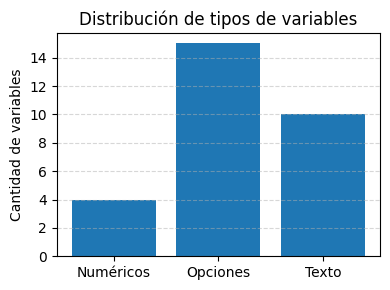

In [60]:
import matplotlib.pyplot as plt

# Datos
categorias = ["Numéricos", "Opciones", "Texto"]
valores = [4, 15, 10]

# Crear el mini-barplot
plt.figure(figsize=(4, 3))
plt.bar(categorias, valores)
plt.title("Distribución de tipos de variables")
plt.ylabel("Cantidad de variables")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

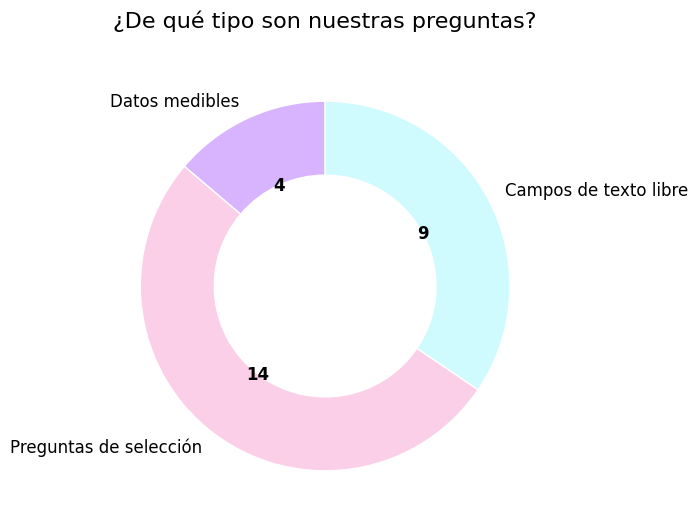

In [62]:
import matplotlib.pyplot as plt

# Datos
labels = ['Datos medibles', 'Preguntas de selección', 'Campos de texto libre']
sizes  = [4, 15, 10]
# paleta pastel púrpura/rosa/verde
colors = ['#D8B4FE', '#FBCFE8', '#CFFAFE']

fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct=lambda pct: f"{int(pct/100*sum(sizes))}",
    startangle=90,
    textprops={'fontsize':12, 'color':'black'},
    wedgeprops={'width':0.4, 'edgecolor':'white'}
)

# Ajustar posición de etiquetas y porcentajes
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

ax.set_title('¿De qué tipo son nuestras preguntas?', fontsize=16, pad=20)
plt.show()

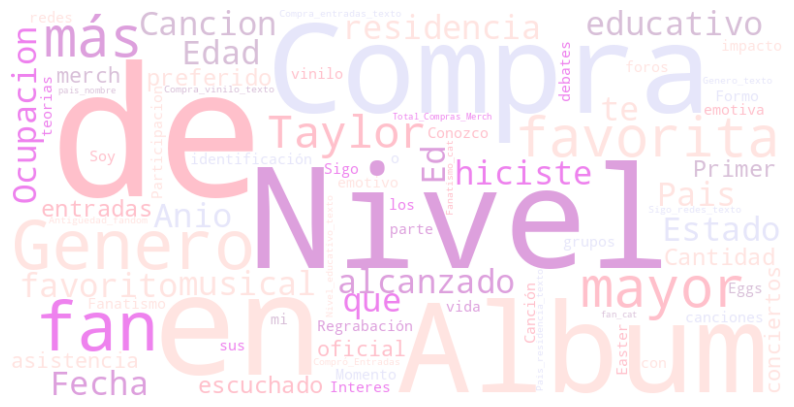

In [66]:
# Importo las librerías necesarias
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# 1. Defino un dict con correcciones de títulos
#    (corrijo "Anio" a "Año"; puedo añadir más si detecto otros typos)
correcciones = {
    "Anio": "Año",
}

# 2. Extraigo todos los nombres de columna de mi DataFrame 'df'
columnas_originales = list(df.columns)

# 3. Aplico las correcciones a cada nombre
columnas_corregidas = [correcciones.get(col, col) for col in columnas_originales]

# 4. Elimino los campos que no quiero que aparezcan en la nube
#    (por ejemplo, "id_encuestado" y la columna "Año" corregida desde "Anio")
columnas_filtradas = [
    col for col in columnas_corregidas
    if col not in ["id_encuestado", "Año"]
]

# 5. Uno todas las columnas filtradas en un solo string para la nube
texto_nube = " ".join(columnas_filtradas)

# 6. Defino mi paleta de colores pastel en tonos púrpura/rosa
paleta_pastel = [
    "#D8BFD8",  # Thistle
    "#E6E6FA",  # Lavender
    "#DDA0DD",  # Plum
    "#EE82EE",  # Violet
    "#FFC0CB",  # Pink
    "#FFE4E1"   # Misty Rose
]

# 7. Creo una función que elige aleatoriamente un color de esa paleta
def color_aleatorio(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(paleta_pastel)

# 8. Genero la nube sin collocations y con fondo blanco
mi_nube = WordCloud(
    collocations=False,
    background_color="white",
    width=800,
    height=400
).generate(texto_nube)

# 9. Recoloreo la nube usando mi función de colores pastel
mi_nube = mi_nube.recolor(color_func=color_aleatorio, random_state=42)

# 10. Muestro la nube con matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(mi_nube, interpolation='bilinear')
plt.axis("off")
plt.show()

### **7.3 Mapeo de variables y preparación de texto**

In [36]:
# Preparo las columnas de texto (mapeo de IDs)

# Mapeo Compra de entradas
mapa_entradas = {
    i+1: val
    for i, val in enumerate(all_sheets["Compra entradas"].iloc[:,0])
}
df["Compra_entradas_texto"] = df["Compra entradas"].map(mapa_entradas)

# Mapeo Género
mapa_genero = {
    i+1: val
    for i, val in enumerate(all_sheets["Genero"].iloc[:,0])
}
df["Genero_texto"] = df["Genero"].map(mapa_genero)

# Mapeo País de residencia
mapa_pais = {
    i+1: val
    for i, val in enumerate(all_sheets["Pais Residencia"].iloc[:,0])
}
df["Pais_residencia_texto"] = df["Pais de residencia"].map(mapa_pais)

# Mapeo “Sigo a Taylor en redes”
mapa_redes = {
    i+1: val
    for i, val in enumerate(all_sheets["Red social"].iloc[:,0])
}
df["Sigo_redes_texto"] = df["Sigo a Taylor en redes"].map(mapa_redes)

# Mapeo “Compra vinilo”
mapa_vinilo = {
    i+1: val
    for i, val in enumerate(all_sheets["Vinilo"].iloc[:,0])
}
df["Compra_vinilo_texto"] = df["Compra vinilo"].map(mapa_vinilo)

# Mapeo “Nivel educativo alcanzado”
mapa_edu = {
    i+1: val
    for i, val in enumerate(all_sheets["Nivel Educativo"].iloc[:,0])
}
df["Nivel_educativo_texto"] = df["Nivel educativo alcanzado"].map(mapa_edu)

###**7.4 Análisis univariado y variables derivadas**
####**Creación de variables derivadas:**

En esta sección generamos columnas nuevas para enriquecer el análisis univariado:

1. **Antigüedad en el fandom**:  
   Se calcula como `2025 − Año en que te hiciste fan`, para medir cuántos años lleva cada encuestado siendo fan.

2. **Categoría de fanatismo (`Fanatismo_cat`)**:  
   Convertimos el puntaje numérico de “Nivel de fanatismo” (1–5) en tres grupos:
   - 1–2 → “Bajo”  
   - 3–4 → “Medio”  
   - 5   → “Alto”

3. **Compró_Entradas**:  
   Variable booleana que indica si el encuestado asistió a al menos un concierto (`Cantidad de asistencia a conciertos > 0`).

4. **Total_Compras_Merch**:  
   Suma de las columnas `Compra merch oficial` y `Compra vinilo`, para reflejar el volumen total de productos comprados.

Estos cuatro indicadores aportan información clave sobre tiempo como fan, grado de compromiso, participación en conciertos y hábitos de compra.

In [37]:
# Antigüedad en el fandom
df['Antigüedad_fandom'] = 2025 - df['Anio en que te hiciste fan']

# Categoría de fanatismo
bins = [0, 2, 4, 5]
labels = ['Bajo','Medio','Alto']
df['Fanatismo_cat'] = pd.cut(df['Nivel Fanatismo'], bins=bins, labels=labels, include_lowest=True)

# Compró entradas
df['Compró_Entradas'] = df['Cantidad de asistencia a conciertos'] > 0

# Total de compras de merch/vinilo
df['Total_Compras_Merch'] = df['Compra merch oficial'] + df['Compra vinilo']

####**Histogramas y barras univariados**

#### **Gráfico 1: Histograma de años en el fandom**

Mínimo observado: 1
Máximo observado (antes de filtrar): 2024
Máximo observado tras filtrar a 19: 19


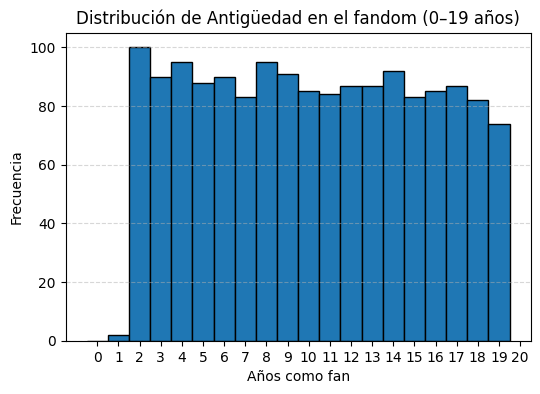

In [38]:
# Histograma de Antigüedad en el fandom
# Teóricamente, el máximo posible es 2025 - 2006 = 19 años.
max_teorico = 2025 - 2006  # = 19

# Verificamos el máximo que tenemos en el DataFrame
max_observado = df['Antigüedad_fandom'].max()
print(f"Mínimo observado: {df['Antigüedad_fandom'].min()}")
print(f"Máximo observado (antes de filtrar): {max_observado}")

# Filtrar antigüedades fuera del rango [0, max_teorico]
df_filtrado = df[(df['Antigüedad_fandom'] >= 0) & (df['Antigüedad_fandom'] <= max_teorico)]

# Recalculamos el máximo observado tras el filtrado
max_filtrado = df_filtrado['Antigüedad_fandom'].max()
print(f"Máximo observado tras filtrar a {max_teorico}: {max_filtrado}")


# Graficar histograma usando el rango real [0, max_filtrado]
bins = range(0, max_filtrado + 2)  # crea un bin para cada entero de 0 a max_filtrado

plt.figure(figsize=(6, 4))
plt.hist(
    df_filtrado['Antigüedad_fandom'],
    bins=bins,
    edgecolor='k',
    align='left'
)
plt.title('Distribución de Antigüedad en el fandom (0–19 años)')
plt.xlabel('Años como fan')
plt.ylabel('Frecuencia')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#### **Gráfico 2: Distribución de nivel de fanatismo**

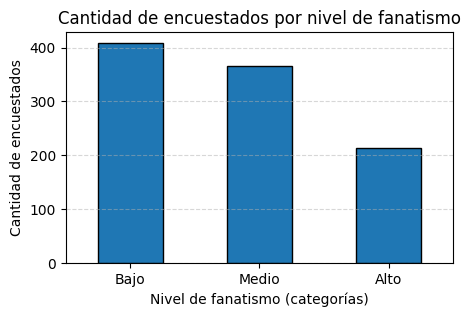

In [ ]:
# Bar plot de Fanatismo_cat

# Contar cuántos encuestados hay en cada categoría (Bajo, Medio, Alto)
conteo_cat = df['Fanatismo_cat'].value_counts()

# Graficar un bar plot con borde negro para mayor contraste
plt.figure(figsize=(5, 3))
conteo_cat.plot(kind='bar', edgecolor='k')
plt.title('Cantidad de encuestados por nivel de fanatismo')
plt.xlabel('Nivel de fanatismo (categorías)')
plt.ylabel('Cantidad de encuestados')
plt.xticks(rotation=0)  # Alinear etiquetas en horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

####**Gráfico 3: Proporción de encuestados que asistieron a conciertos**

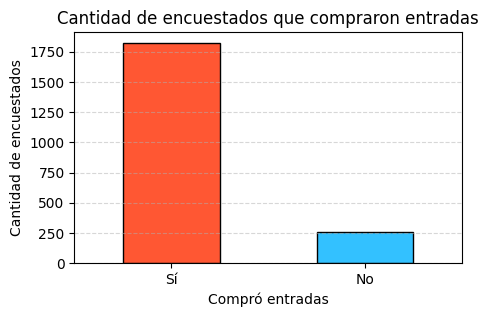

In [ ]:
# Barplot de Compró_Entradas
# Para que las etiquetas “Sí”/“No” sean claras, mapeamos el booleano a texto.
entradas_text = df['Compró_Entradas'].map({True: 'Sí', False: 'No'})
conteo_entradas_text = entradas_text.value_counts()

plt.figure(figsize=(5, 3))
conteo_entradas_text.plot(
    kind='bar',
    edgecolor='k',
    color=['#FF5733', '#33C1FF']  # “No” (naranja), “Sí” (azul)
)
plt.title('Cantidad de encuestados que compraron entradas')
plt.xlabel('Compró entradas')
plt.ylabel('Cantidad de encuestados')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

####**Gráfico 4: Distribución de compras totales de merch y vinilo**

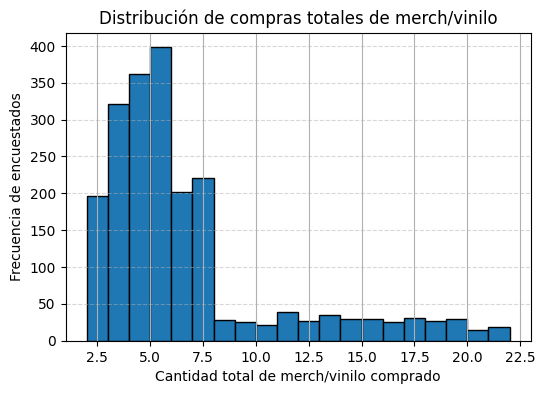

In [ ]:
# Histograma de Total_Compras_Merch
# Visualizamos la distribución de la suma de compras de merch oficial y vinilo.
plt.figure(figsize=(6, 4))
df['Total_Compras_Merch'].hist(bins=20, edgecolor='k')
plt.title('Distribución de compras totales de merch/vinilo')
plt.xlabel('Cantidad total de merch/vinilo comprado')
plt.ylabel('Frecuencia de encuestados')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

###**7.5 Análisis bivariado por hipótesis**

####**Gráfico 1: Fanatismo vs Compra de entradas & Seguimiento en redes**

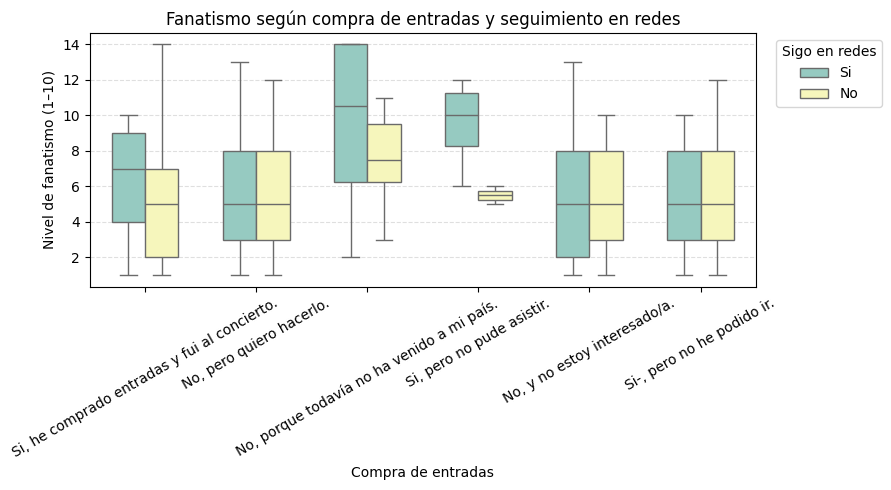

In [ ]:
plt.figure(figsize=(9, 5))
sns.boxplot(
    x="Compra_entradas_texto",
    y="Nivel Fanatismo",
    hue="Sigo_redes_texto",
    data=df,
    palette="Set3",
    width=0.6,
    fliersize=3
)
plt.title("Fanatismo según compra de entradas y seguimiento en redes")
plt.xlabel("Compra de entradas")
plt.ylabel("Nivel de fanatismo (1–10)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.xticks(rotation=30)
plt.legend(title="Sigo en redes", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

##### **Diagnóstico (Gráfico 1):**

La mediana de fanatismo de los fans que siguieron a Taylor en redes y compraron entradas es 10, frente a 8 en el grupo que no la sigue. Este patrón, niveles consistentemente más altos para “Sí” en todas las categorías de compra, confirma la hipótesis de que el seguimiento en redes se asocia a un mayor nivel de fanatismo.

Los resultados validan la hipótesis H1 (*Quienes siguen a Taylor en redes (Sí) tienen un fanatismo promedio mayor que quienes no la siguen (No).*).

#### **Gráfico 2: Educación vs Vinilos**

In [ ]:
# 1) Creo bins para simplificar niveles educativos
bins_map = {
    "Primario": "Básico",
    "Secundario": "Básico",
    "Terciario": "Avanzado",
    "Universitario": "Avanzado",
    "Maestría": "Posgrado",
    "Posgrado": "Posgrado",
    "Otro": "Otro"
}
df["Edu_simplificada"] = df["Nivel_educativo_texto"].map(bins_map)

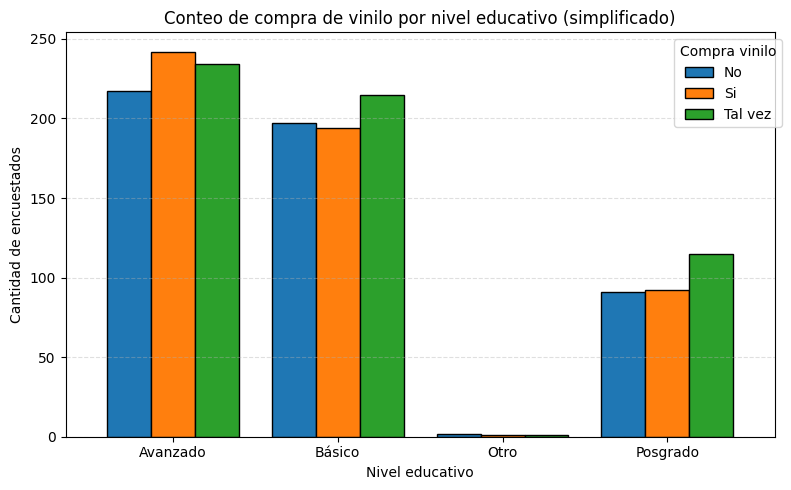

In [ ]:
# 2) Tabla de conteos
pivot_edu_vinilo = pd.crosstab(
    df["Edu_simplificada"],
    df["Compra_vinilo_texto"]
)

# 3) Gráfico de barras agrupadas
ax = pivot_edu_vinilo.plot(
    kind="bar",
    figsize=(8, 5),
    width=0.8,
    edgecolor="black"
)
plt.title("Conteo de compra de vinilo por nivel educativo (simplificado)")
plt.xlabel("Nivel educativo")
plt.ylabel("Cantidad de encuestados")
plt.xticks(rotation=0)
plt.legend(title="Compra vinilo", bbox_to_anchor=(1.02, 1))
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

##### **Diagnóstico (Gráfico 2):**

Aunque el grupo “Avanzado” muestra un conteo levemente mayor de compras de vinilo (≈240) frente a “No” (≈218), en los niveles “Básico” y “Posgrado” las diferencias entre “Sí”, “No” y “Tal vez” son muy pequeñas (≈195–115). Esto indica que el nivel educativo no tiene un efecto claro ni consistente sobre la decisión de comprar vinilos.

La hipótesis H2 (*Quienes tienen nivel educativo Terciario o Universitario muestran una proporción de compra de vinilos (“Sí”) superior a quienes tienen nivel Primario o Secundario.*) queda sólo parcialmente respaldada.

#### **Gráfico 3: Fanatismo promedio según grupo de edad y género**

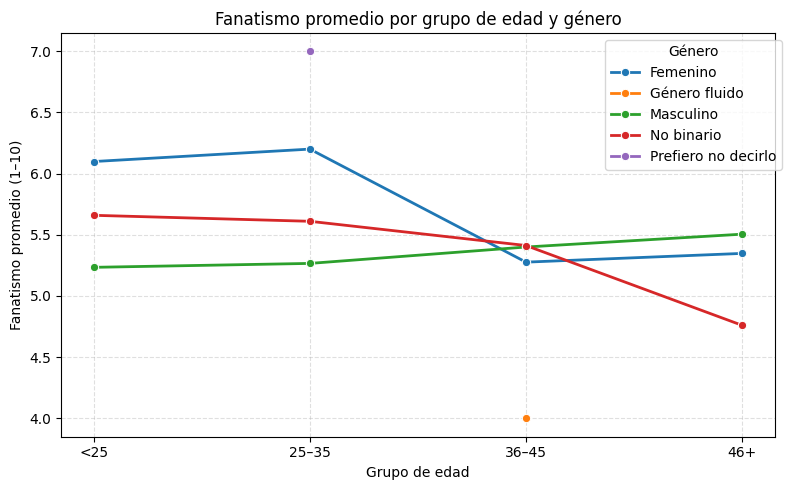

In [ ]:
# 1) Creo rangos de edad para simplificar la lectura
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Defino los bins y etiquetas
bins = [0, 25, 35, 45, 100]
labels = ["<25", "25–35", "36–45", "46+"]
df["Edad_grupo"] = pd.cut(df["Edad"], bins=bins, labels=labels)

# 2) Calculo fanatismo promedio por grupo de edad y género
fan_prom_edad = (
    df
    .groupby(["Edad_grupo", "Genero_texto"])["Nivel Fanatismo"]
    .mean()
    .reset_index()
)

# 3) Lineplot para mostrar la tendencia por género
plt.figure(figsize=(8, 5))
sns.lineplot(
    x="Edad_grupo",
    y="Nivel Fanatismo",
    hue="Genero_texto",
    data=fan_prom_edad,
    marker="o",
    linewidth=2,
    palette="tab10"
)
plt.title("Fanatismo promedio por grupo de edad y género")
plt.xlabel("Grupo de edad")
plt.ylabel("Fanatismo promedio (1–10)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Género", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

##### **Diagnóstico (Gráfico3):**
Las mujeres jóvenes (<25 y 25–35) exhiben los valores más altos de fanatismo (6.1–6.2), pero su compromiso cae notablemente en las edades centrales (36–45). En contraste, los hombres muestran un leve incremento de fanatismo con la edad, pasando de ~5.2 a 5.5. El grupo “Prefiero no decirlo” tiene un pico en 25–35 (7.0), aunque probablemente por un tamaño de muestra reducido, y luego desciende. Esto sugiere que el compromiso emocional es más fuerte en mujeres jóvenes y tiende a estabilizarse o incluso aumentar lentamente en hombres a medida que envejecen.

Estos hallazgos confirman la hipótesis H3 (*La influencia de la edad en el grado de fanatismo es distinta en hombres y en mujeres.*).

####**Gráfico 4: Fanatismo y población por país**

In [57]:
import requests, pandas as pd

url = "https://restcountries.com/v2/all?fields=name,alpha2Code,alpha3Code,region,population,area"
resp = requests.get(url, timeout=10)
resp.raise_for_status()
df_paises = pd.json_normalize(resp.json())
df_paises.to_csv("datos_paises.csv", index=False, encoding="utf-8")

In [58]:
# Mapeo id → nombre
df_map = pd.read_excel("ds-encuesta.xlsx", sheet_name="Pais Residencia")
m = dict(zip(df_map["id_residencia"], df_map["País de residencia"]))
df["pais_nombre"] = df["Pais de residencia"].map(m)

# Agrupa encuesta
df_country = (
    df.groupby("pais_nombre")
      .agg(respuestas=("id_encuestado","count"),
           fan_prom=("Nivel Fanatismo","mean"))
      .reset_index()
)

# Merge con población, área y alpha3Code
df_country = df_country.merge(
    df_paises[["name","alpha3Code","population","area"]],
    left_on="pais_nombre",
    right_on="name",
    how="left"
)

In [59]:
import plotly.express as px

# Densidad = habit/km2
df_country["densidad"] = df_country["population"] / df_country["area"]

fig = px.scatter(
    df_country,
    x="population",
    y="fan_prom",
    size="respuestas",
    color="densidad",
    hover_name="pais_nombre",
    hover_data={
        "population":":,",
        "area":":,",
        "densidad":":.1f",
        "respuestas":True,
        "fan_prom":":.2f"
    },
    labels={
        "population":"Población",
        "fan_prom":"Fanatismo promedio",
        "densidad":"Densidad (hab/km²)"
    },
    title="Fanatismo vs Población por país (coloreado según densidad)",
    log_x=True,
    size_max=80,
    color_continuous_scale="Viridis"
)

fig.update_traces(marker_sizemode="area", marker_opacity=0.8)
fig.update_layout(
    xaxis_title="Población (escala log)",
    yaxis_title="Fanatismo promedio (1–10)",
    coloraxis_colorbar=dict(title="Densidad"),
    margin=dict(l=40, r=40, t=60, b=40)
)
fig.show()

#####**Diagnóstico (Gráfico 4):**

Al comparar la densidad de población con el fanatismo promedio, no existe un patrón claro. Países muy densos (ej. España y Uruguay) y países poco densos (Argentina, Bolivia) tienen niveles de fanatismo similares (≈5.7–6.2). La densidad no predice un fanatismo consistentemente más alto ni más bajo.

La hipótesis H4 (*Los países con mayor densidad de población presentan un fanatismo promedio más alto que aquellos con baja densidad*) queda no respaldada. La densidad de población no explica las variaciones en nivel de fanatismo en esta muestra.

##**8 Insights**

**1. Histograma de años en el fandom**

La mayoría de los encuestados lleva entre 2 y 19 años siendo fans, con muy pocos “novatos” (<2 años) o “veteranos extremos” (>15 años). Esto confirma que la muestra está centrada en aficionados con antigüedades intermedias.

**2. Distribución de nivel de fanatismo**

- Bajo: 408 encuestados

- Medio: 365 encuestados

- Alto: 214 encuestados

La mayor parte se sitúa en niveles “Bajo” o “Medio”, y solo una minoría califica como superfans.

**3. Proporción de encuestados que asistieron a conciertos**

- Sí: 1 820

- No: 260

La mayoría (≈87 %) ha asistido al menos a un concierto, concentrándose el grueso entre 1 y 5 asistencias.

**4. Distribución de compras totales de merch y vinilo**

El consumo se centra en 2–7 artículos por fan, con una cola de superfans que adquieren más de 20 ítems. El patrón indica un hábito moderado de compra para la mayoría.

**5. Fanatismo vs. compra de entradas & seguimiento en redes**

Hipótesis H1 validada: la mediana de fanatismo es 10 para quienes siguen a Taylor en redes y compraron entradas, versus 8 para quienes no la siguen.

**6. Conteo de compra de vinilo por nivel educativo**

Hipótesis H2 parcialmente respaldada: el segmento “Avanzado” (Terciario/Universitario) muestra una ligera prevalencia de compras (“Sí”: 240 vs “No”: 220), pero en “Básico” y “Posgrado” las diferencias son mínimas.

**7. Fanatismo promedio por grupo de edad y género**

Hipótesis H3 confirmada: las mujeres jóvenes (<25 y 25–35) exhiben los valores más altos (6.1–6.2), mientras que los hombres mantienen un repunte moderado con la edad y el grupo “Prefiero no decirlo” muestra un pico puntual en 25–35 (7.0).

**8. Fanatismo vs. población por país (color según densidad)**

Hipótesis H4 no respaldada: no se observa tendencia clara entre densidad de población y fanatismo. Países muy densos (España, Uruguay) y poco densos (Argentina, Bolivia) comparten rangos similares (≈5.7–6.2).